# Task 3

Machine Learning and Statistics

 Winter 2023/2024

by Brid Kennedy

***

Perform a t-test on the famous penguins data set<sup>1</sup> to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.

1. mwaskom/seaborn-data: Data repository for seaborn examples. Aug. 30, 2023. url:
https : / / github . com / mwaskom /seaborn - data / blob / master /penguins.csv (visited on 08/30/2023).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# GitHub URL to the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"

# Read the dataset into a DataFrame
penguins_data = pd.read_csv(url)


In [2]:
#to take a look at the format of the data use the head function in pandas
penguins_data.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


I am not familar with the penguin dataset to I will compute some basic descriptive statistics for numerical columns in the dataset, such as mean, median, standard deviation, and quartiles using the describe() method:

In [3]:
penguins_data.describe()



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


I still don't have a handle on how many species are contained in the dataset so I will try some data visualization to provide insights into the data using Matplotlib and Seaborn to create various plots. 


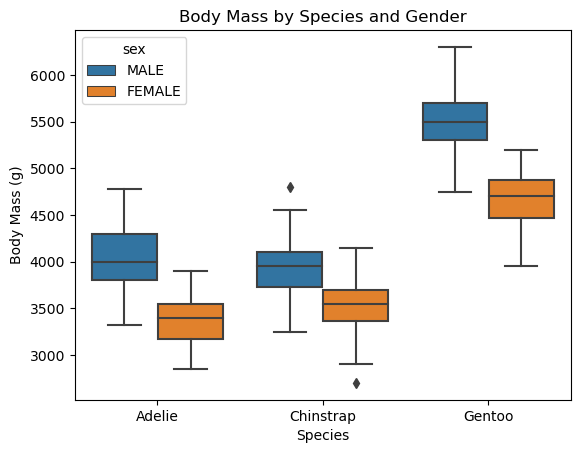

In [4]:
#Box Plots: Box plots can show the distribution of body mass by species and gender.
sns.boxplot(x="species", y="body_mass_g", hue="sex", data=penguins_data)
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.title("Body Mass by Species and Gender")
plt.show()




Now I can see that there are three species in the dataset. I want to know the size of the sample for each of the three species.
Using the value_counts() method to get a count of unique values in a specific column

In [5]:
penguins_data['species'].value_counts()


Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Now I need to filter the dataset to include only the gentoo penguins (species "Gentoo") and separate it into male and female groups.

In [6]:
# Filter the data for Gentoo penguins
gentoo_data = penguins_data[penguins_data['species'] == 'Gentoo']

gentoo_data.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,123.000000,123.000000,123.000000,123.000000
mean,47.504878,14.982114,217.186992,5076.016260
std,3.081857,0.981220,6.484976,504.116237
min,40.900000,13.100000,203.000000,3950.000000
25%,45.300000,14.200000,212.000000,4700.000000
50%,47.300000,15.000000,216.000000,5000.000000
75%,49.550000,15.700000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


In [10]:
 #Separate the data into male and female groups
male_data = gentoo_data.loc[gentoo_data['sex'] == 'MALE']
female_data = gentoo_data.loc[gentoo_data['sex'] == 'FEMALE']



In [11]:
# Check the size and contents of the gentoo_data DataFrame
print(gentoo_data.shape)
print(gentoo_data.head())



(124, 7)
    species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
220  Gentoo  Biscoe            46.1           13.2              211.0   
221  Gentoo  Biscoe            50.0           16.3              230.0   
222  Gentoo  Biscoe            48.7           14.1              210.0   
223  Gentoo  Biscoe            50.0           15.2              218.0   
224  Gentoo  Biscoe            47.6           14.5              215.0   

     body_mass_g     sex  
220       4500.0  FEMALE  
221       5700.0    MALE  
222       4450.0  FEMALE  
223       5700.0    MALE  
224       5400.0    MALE  


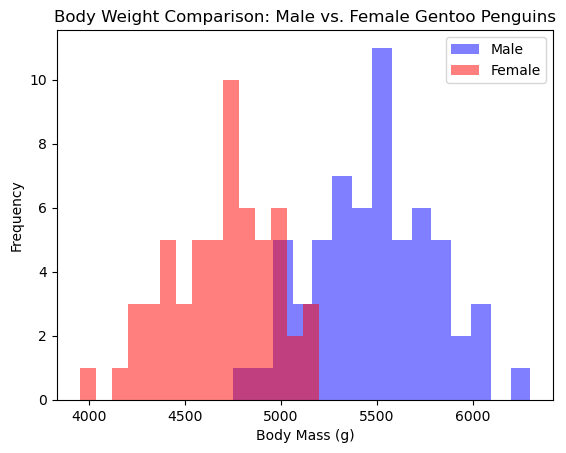

In [13]:
#Drop missing values from the original DataFrame
penguins_data.dropna(subset=['body_mass_g'], inplace=True)

# Create a histogram for male Gentoo penguins
plt.hist(male_data['body_mass_g'], bins=15, alpha=0.5, label='Male', color='blue')

# Create a histogram for female Gentoo penguins
plt.hist(female_data['body_mass_g'], bins=15, alpha=0.5, label='Female', color='red')

# Add labels and a legend
plt.xlabel("Body Mass (g)")
plt.ylabel("Frequency")
plt.title("Body Weight Comparison: Male vs. Female Gentoo Penguins")
plt.legend()

# Show the histogram
plt.show()


By eye it looks like the male and female body weights differ significantly but the heaviest females do overlap with the lightest males

# Perform the t-Test:

Use scipy.stats library to perform the t-test. Specifically,the ttest_ind function to compare the body mass of male and female gentoo penguins:


In [16]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(male_data['body_mass_g'], female_data['body_mass_g'])

print("t-statistic:", t_stat)
print("p-value:", p_value)
alpha = 0.05  # Set your significance level (alpha)

if p_value < alpha:
    print("The p-value is less than", alpha)
    print("Reject the null hypothesis (H0): There is a significant difference in body mass between male and female Gentoo penguins.")
else:
    print("The p-value is greater than or equal to", alpha)
    print("Fail to reject the null hypothesis (H0): There is no significant difference in body mass between male and female Gentoo penguins.")



t-statistic: 14.721676481405709
p-value: 2.133687602018886e-28
The p-value is less than 0.05
Reject the null hypothesis (H0): There is a significant difference in body mass between male and female Gentoo penguins.


Since the P value has 28 zeros in front of the 2.133... the analysis indicates that there is a significant difference in body mass between male and female Gentoo penguins.



END
